<a href="https://colab.research.google.com/github/aaasatoou/bootcamp_blue_Projeto2/blob/main/notebooks/sprint2/Gustavo/Estudo_se_s%C3%A9rie_temporal_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Série Temporal Covid

Neste notebook será feito o estudo de serie temporal sobre os casos de covid, a partir dos dados obtido no *kaggle* (que pode ser obtido [aqui](https://www.kaggle.com/datasets/woohanyoung/timeserise19covidcombined-csvcsv)) no qual primeiro será feito uma análise exploratória depois será feita o préprocessamento e por seguinte a modelagem.

In [ ]:
# importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
time = pd.read_csv('time-series-19-covid-combined_csv.csv')
time.drop('Province/State',axis=1,inplace=True)
time.head()

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199640 entries, 0 to 199639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            199640 non-null  object 
 1   Country/Region  199640 non-null  object 
 2   Confirmed       199640 non-null  int64  
 3   Recovered       188232 non-null  float64
 4   Deaths          199640 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


Converter o atributo *Date* de object para *datetime*.

In [ ]:
time['Date'] = pd.to_datetime(time['Date'],format='%Y-%m-%d')

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199640 entries, 0 to 199639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            199640 non-null  datetime64[ns]
 1   Country/Region  199640 non-null  object        
 2   Confirmed       199640 non-null  int64         
 3   Recovered       188232 non-null  float64       
 4   Deaths          199640 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.6+ MB


In [ ]:
time.head()

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0


Essa análise será focado nos seguintes paíse:

- Espanha;
- Chile;
- Equador;
- México;
- Argentina.

## Análise de série temporal Espanha

In [ ]:
time_spa =time[time['Country/Region']=='Spain']
time_spa.reset_index(inplace=True)
time_spa.drop(['index','Country/Region'],axis=1,inplace=True)
time_spa.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0.0,0
1,2020-01-23,0,0.0,0
2,2020-01-24,0,0.0,0
3,2020-01-25,0,0.0,0
4,2020-01-26,0,0.0,0


In [ ]:
time_spa['Ano'] = time_spa['Date'].dt.year
time_spa.head()

<ipython-input-58-80366b3fe2fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_spa['Ano'] = time_spa['Date'].dt.year


,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


In [84]:
time_spa['Mês'] = time_spa['Date'].dt.month
time_spa.head()

<ipython-input-84-3e91972680a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_spa['Mês'] = time_spa['Date'].dt.month


,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


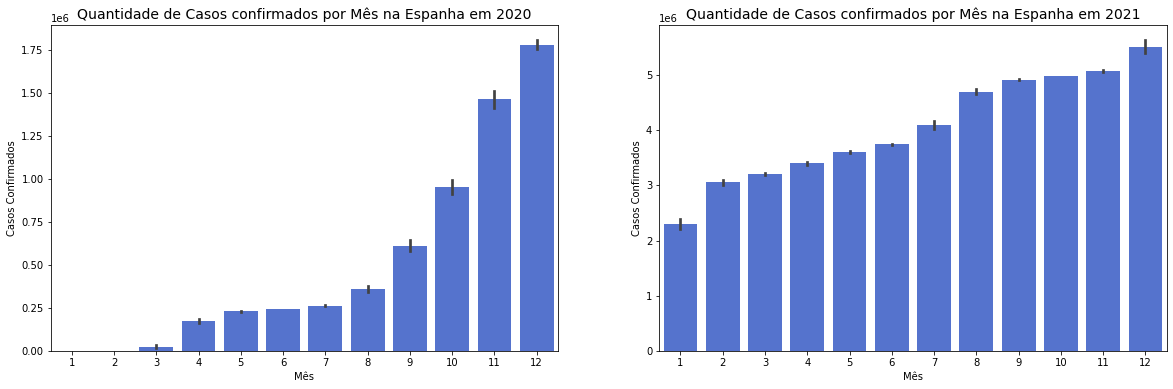

In [93]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Quantidade de Casos confirmados por Mês na Espanha em 2020',fontsize=14)
sns.barplot(y='Confirmed',x='Mês',data=time_spa[time_spa['Ano']==2020],
            color='royalblue')
plt.xlabel('Mês')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Quantidade de Casos confirmados por Mês na Espanha em 2021',fontsize=14)
sns.barplot(y='Confirmed',x='Mês',data=time_spa[time_spa['Ano']==2021],
            color='royalblue')
plt.xlabel('Mês')
plt.ylabel('Casos Confirmados');

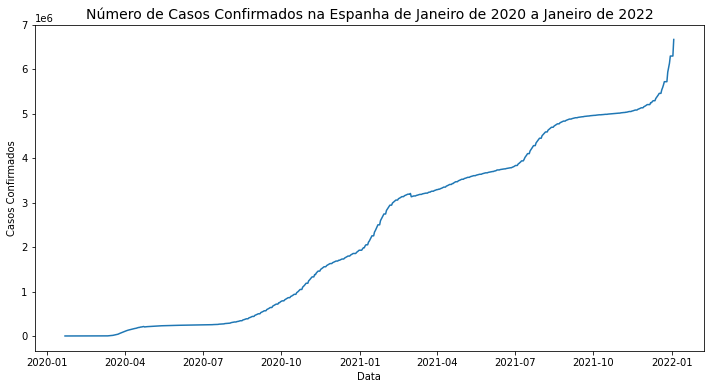

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Casos Confirmados na Espanha de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_spa)
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

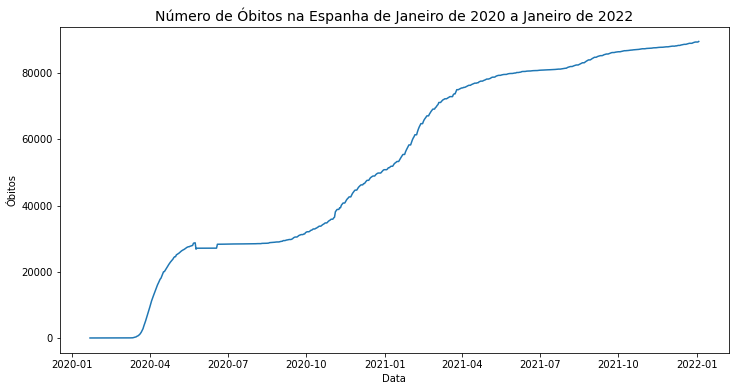

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Óbitos na Espanha de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_spa)
plt.xlabel('Data')
plt.ylabel('Óbitos');

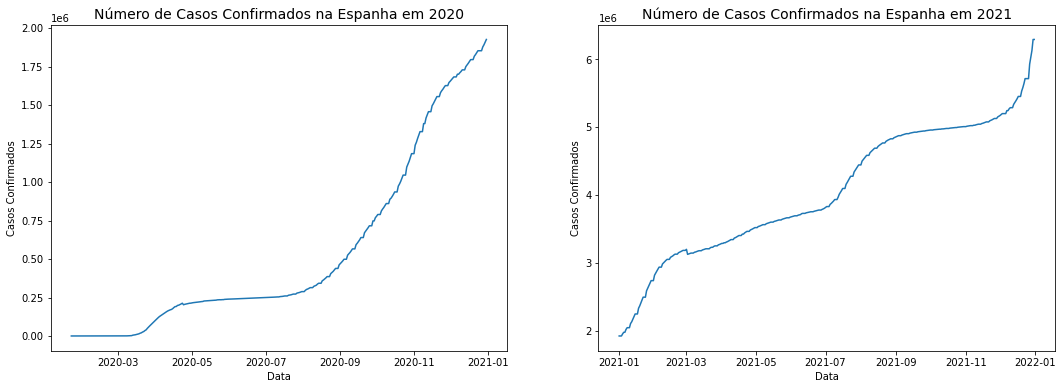

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Casos Confirmados na Espanha em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_spa[time_spa['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Casos Confirmados na Espanha em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_spa[time_spa['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

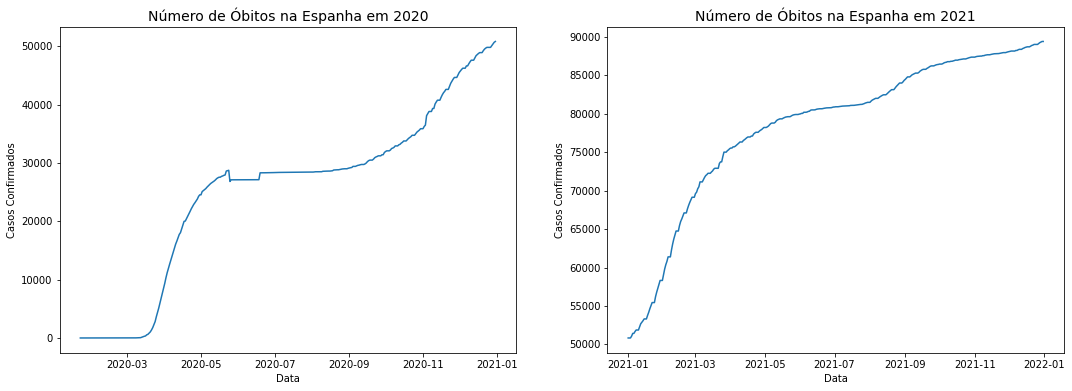

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Óbitos na Espanha em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_spa[time_spa['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Óbitos na Espanha em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_spa[time_spa['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

## Análise de série temporal Chile

In [ ]:
time_chi =time[time['Country/Region']=='Chile']
time_chi.reset_index(inplace=True)
time_chi.drop(['index','Country/Region'],axis=1,inplace=True)
time_chi.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0.0,0
1,2020-01-23,0,0.0,0
2,2020-01-24,0,0.0,0
3,2020-01-25,0,0.0,0
4,2020-01-26,0,0.0,0


In [67]:
time_chi['Ano'] = time_chi['Date'].dt.year
time_chi.head()

<ipython-input-67-fa48d5e5abf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_chi['Ano'] = time_chi['Date'].dt.year


,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


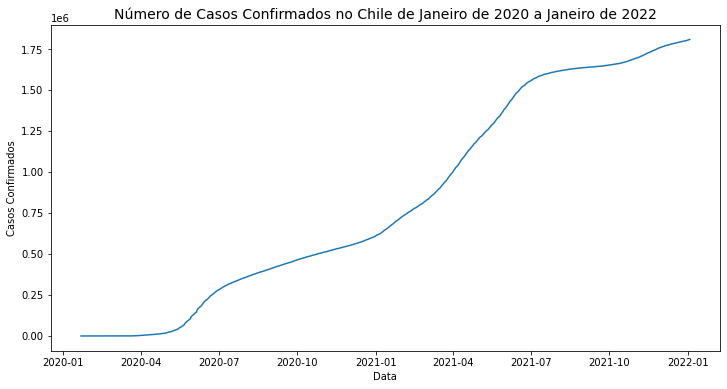

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Casos Confirmados no Chile de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_chi)
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

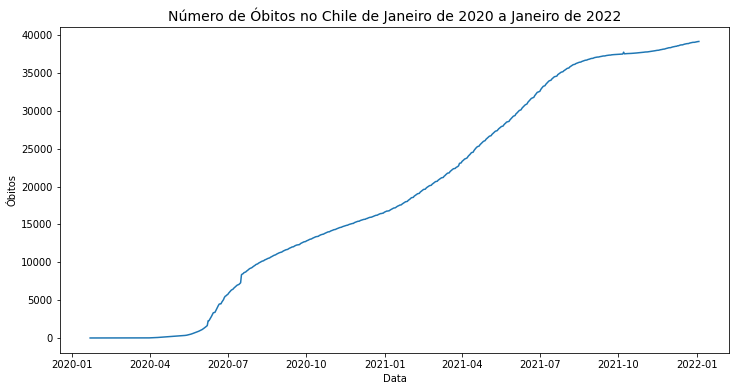

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Óbitos no Chile de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_chi)
plt.xlabel('Data')
plt.ylabel('Óbitos');

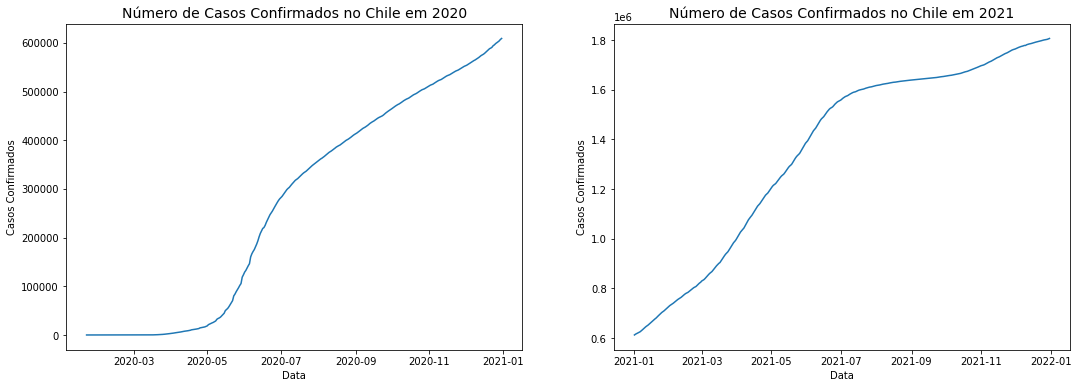

In [73]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Casos Confirmados no Chile em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_chi[time_chi['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Casos Confirmados no Chile em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_chi[time_chi['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

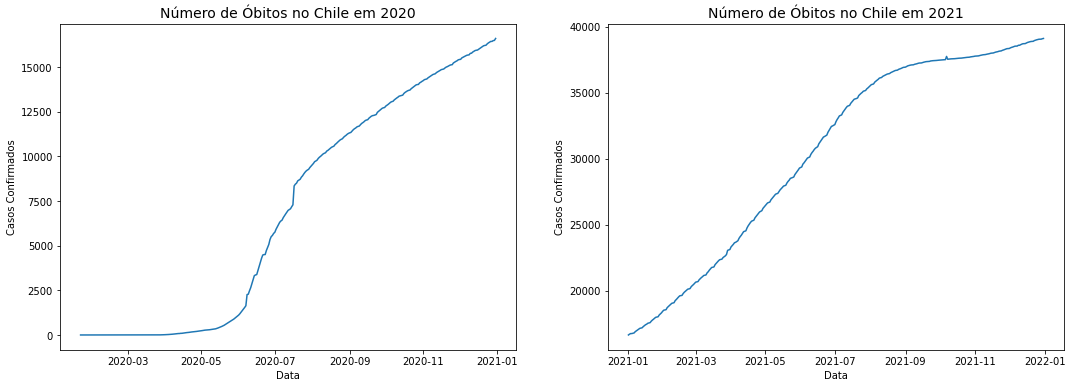

In [69]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Óbitos no Chile em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_chi[time_chi['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Óbitos no Chile em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_chi[time_chi['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

## Análise de série temporal Equador

In [ ]:
time_equ = time[time['Country/Region']=='Ecuador']
time_equ.reset_index(inplace=True)
time_equ.drop(['index','Country/Region'],axis=1,inplace=True)
time_equ.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0.0,0
1,2020-01-23,0,0.0,0
2,2020-01-24,0,0.0,0
3,2020-01-25,0,0.0,0
4,2020-01-26,0,0.0,0


In [70]:
time_equ['Ano'] = time_equ['Date'].dt.year
time_equ.head()

<ipython-input-70-92d2bace39a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_equ['Ano'] = time_equ['Date'].dt.year


,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


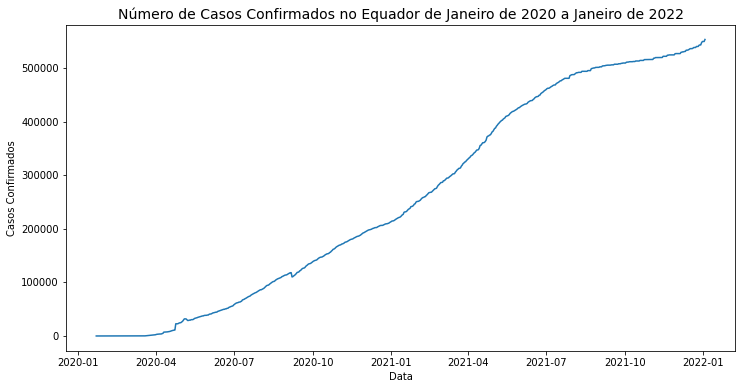

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Casos Confirmados no Equador de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_equ)
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

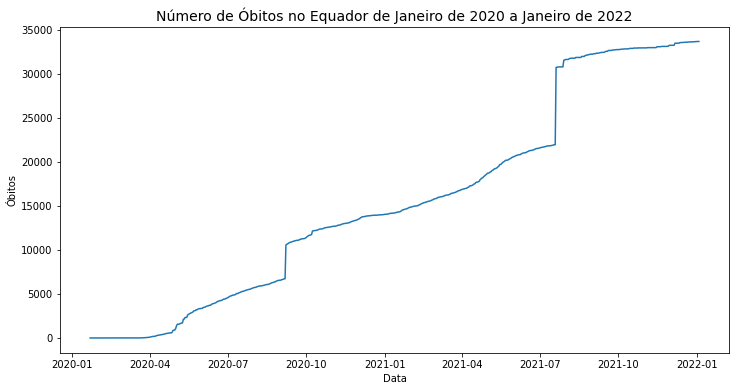

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Óbitos no Equador de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_equ)
plt.xlabel('Data')
plt.ylabel('Óbitos');

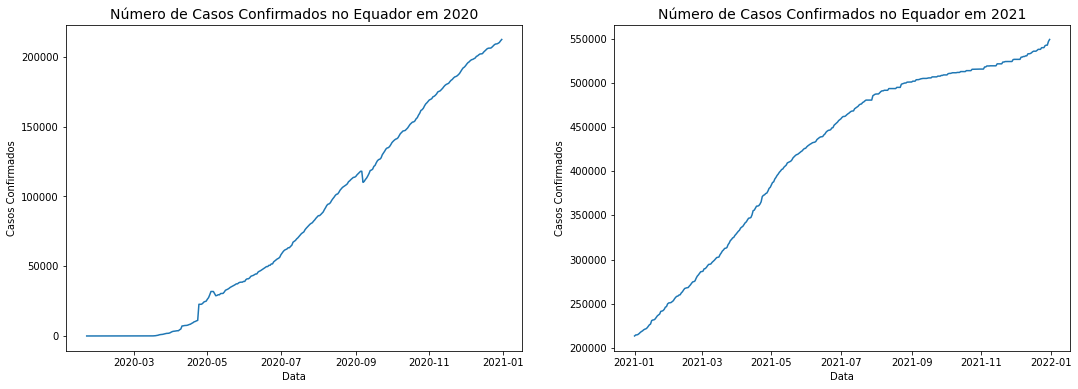

In [74]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Casos Confirmados no Equador em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_equ[time_equ['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Casos Confirmados no Equador em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_equ[time_equ['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

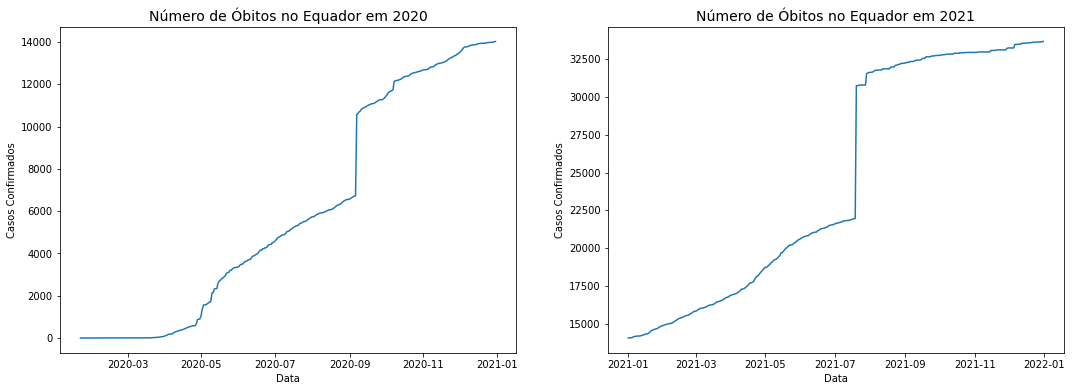

In [72]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Óbitos no Equador em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_equ[time_equ['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Óbitos no Equador em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_equ[time_equ['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

## Análise de Serie Temporal Mexico

In [ ]:
time_mex = time[time['Country/Region']=='Mexico']
time_mex.reset_index(inplace=True)
time_mex.drop(['index','Country/Region'],axis=1,inplace=True)
time_mex.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0.0,0
1,2020-01-23,0,0.0,0
2,2020-01-24,0,0.0,0
3,2020-01-25,0,0.0,0
4,2020-01-26,0,0.0,0


In [78]:
time_mex['Ano'] = time_mex['Date'].dt.year
time_mex.head()

<ipython-input-78-59f076520707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_mex['Ano'] = time_mex['Date'].dt.year


,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


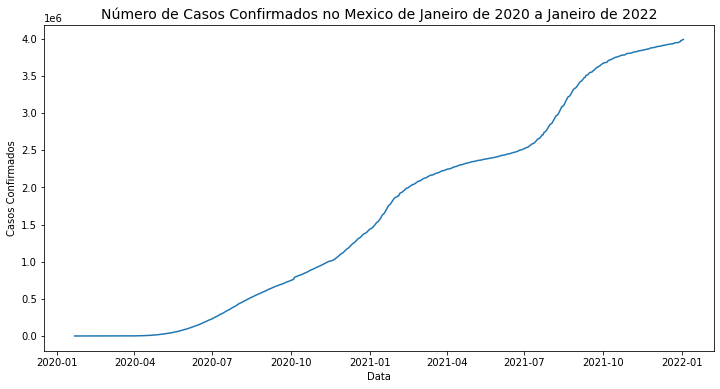

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Casos Confirmados no Mexico de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_mex)
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

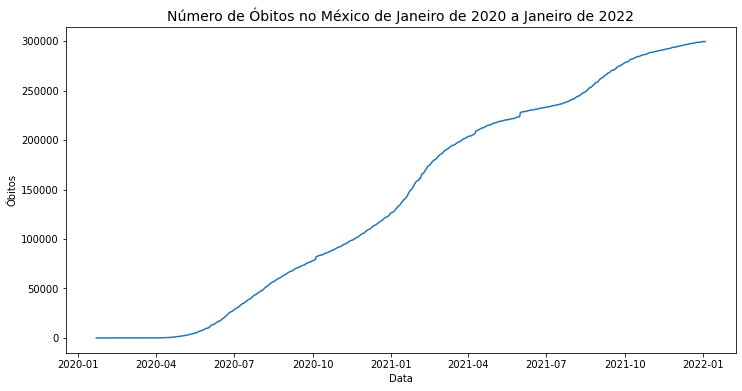

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Óbitos no México de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_mex)
plt.xlabel('Data')
plt.ylabel('Óbitos');

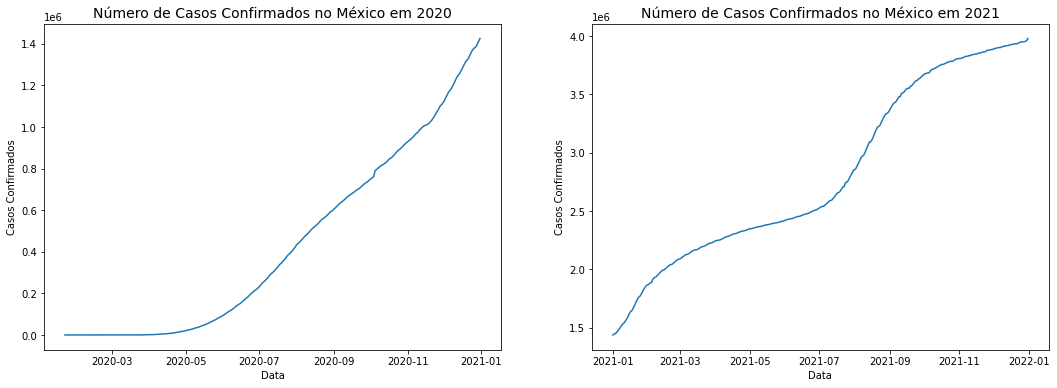

In [79]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Casos Confirmados no México em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_mex[time_mex['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Casos Confirmados no México em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_mex[time_mex['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

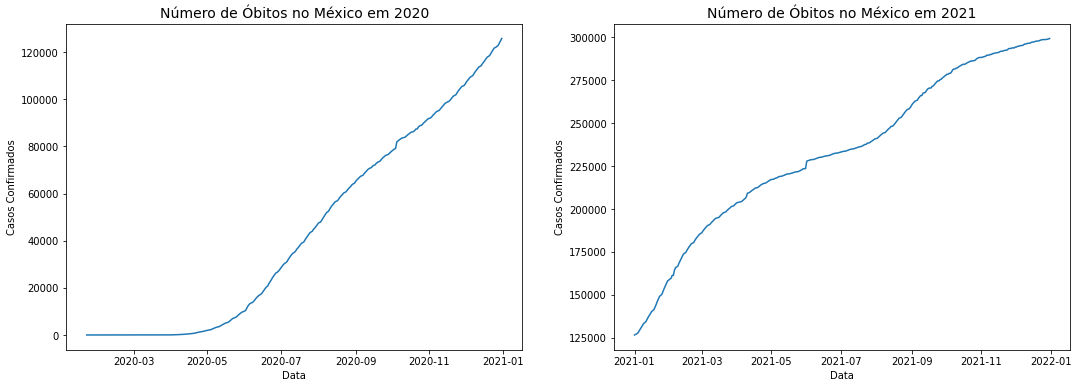

In [80]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Óbitos no México em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_mex[time_mex['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Óbitos no México em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_mex[time_mex['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

## Analise Serie Temporal Argentina

In [ ]:
time_arg = time[time['Country/Region']=='Argentina']
time_arg.reset_index(inplace=True)
time_arg.drop(['index','Country/Region'],axis=1,inplace=True)
time_arg.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0.0,0
1,2020-01-23,0,0.0,0
2,2020-01-24,0,0.0,0
3,2020-01-25,0,0.0,0
4,2020-01-26,0,0.0,0


In [75]:
time_arg['Ano'] = time_arg['Date'].dt.year
time_arg.head()

<ipython-input-75-661ff7a845fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_arg['Ano'] = time_arg['Date'].dt.year


,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


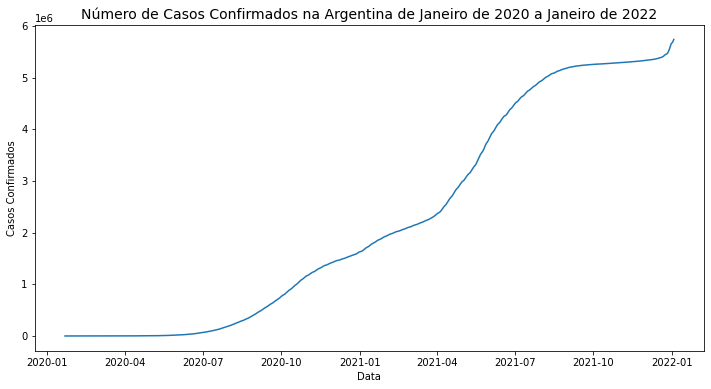

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Casos Confirmados na Argentina de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_arg)
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

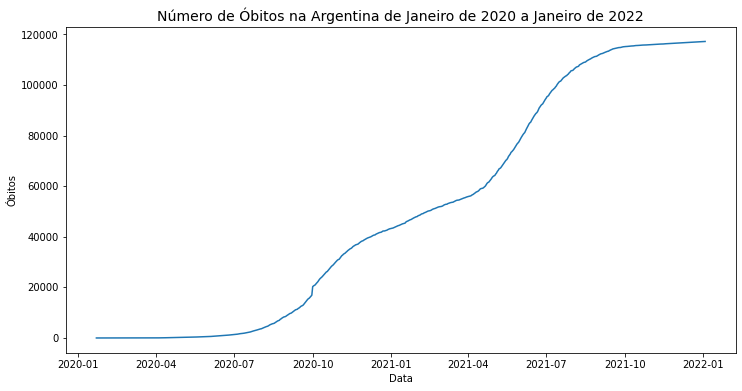

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de Óbitos na Argentina de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_arg)
plt.xlabel('Data')
plt.ylabel('Óbitos');

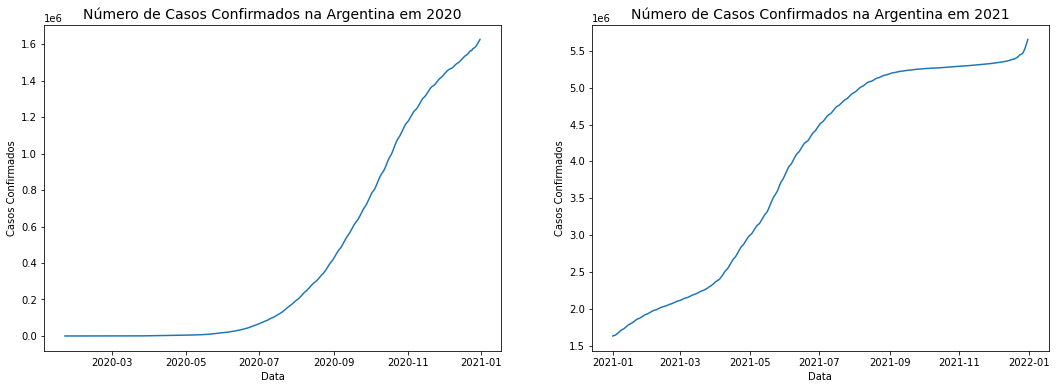

In [76]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Casos Confirmados na Argentina em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_arg[time_arg['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Casos Confirmados na Argentina em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_arg[time_arg['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

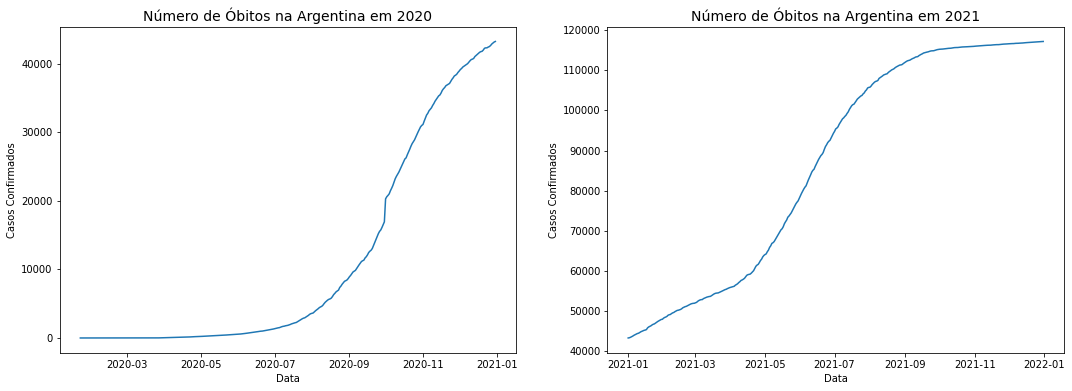

In [77]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Número de Óbitos na Argentina em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_arg[time_arg['Ano']==2020])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Óbitos na Argentina em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_arg[time_arg['Ano']==2021])
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

## Comparação dos Paise Escolhidos Para Análise

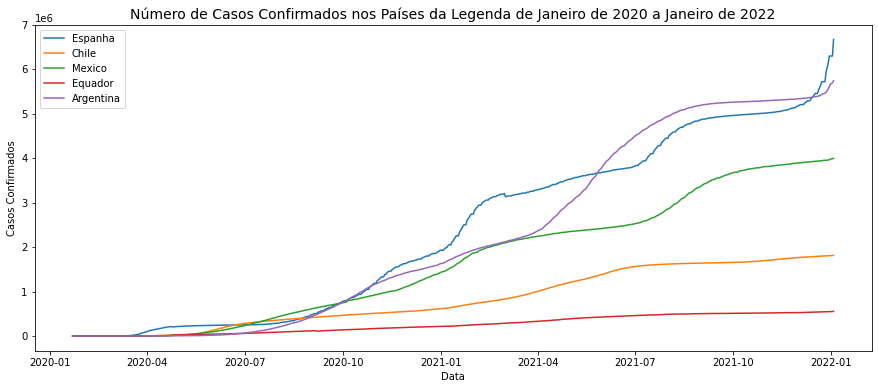

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Número de Casos Confirmados nos Países da Legenda de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_spa,label='Espanha')
sns.lineplot(x='Date',y='Confirmed',data=time_chi,label='Chile')
sns.lineplot(x='Date',y='Confirmed',data=time_mex,label='Mexico')
sns.lineplot(x='Date',y='Confirmed',data=time_equ,label='Equador')
sns.lineplot(x='Date',y='Confirmed',data=time_arg,label='Argentina')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');

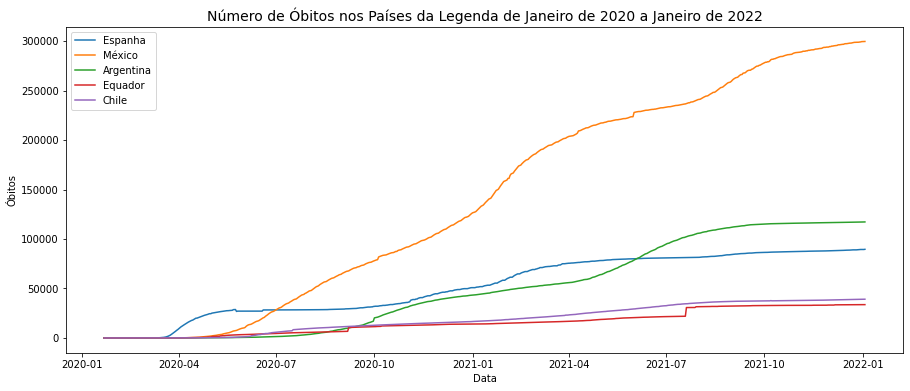

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Número de Óbitos nos Países da Legenda de Janeiro de 2020 a Janeiro de 2022',
          fontsize=14)
sns.lineplot(x='Date',y='Deaths',data=time_spa,label='Espanha')
sns.lineplot(x='Date',y='Deaths',data=time_mex,label='México')
sns.lineplot(x='Date',y='Deaths',data=time_arg,label='Argentina')
sns.lineplot(x='Date',y='Deaths',data=time_equ,label='Equador')
sns.lineplot(x='Date',y='Deaths',data=time_chi,label='Chile')
plt.xlabel('Data')
plt.ylabel('Óbitos');

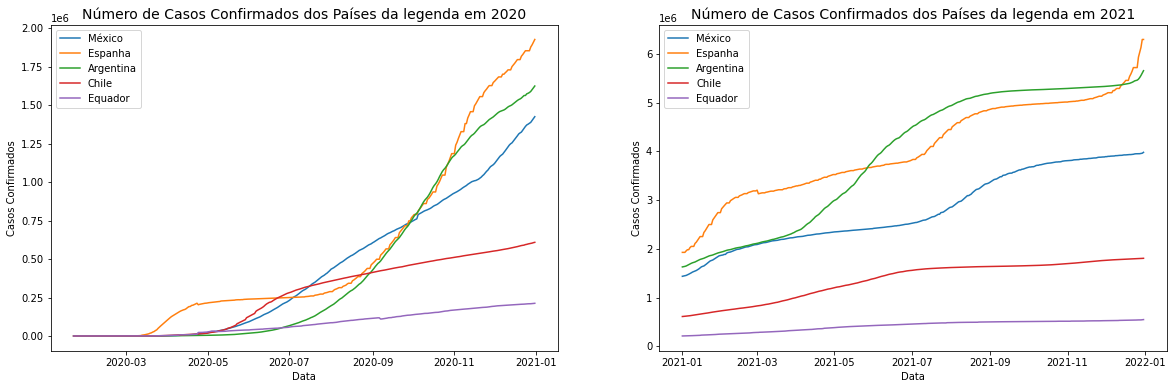

In [82]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Número de Casos Confirmados dos Países da legenda em 2020',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_mex[time_mex['Ano']==2020],label='México')
sns.lineplot(x='Date',y='Confirmed',data=time_spa[time_spa['Ano']==2020],label='Espanha')
sns.lineplot(x='Date',y='Confirmed',data=time_arg[time_arg['Ano']==2020],label='Argentina')
sns.lineplot(x='Date',y='Confirmed',data=time_chi[time_chi['Ano']==2020],label='Chile')
sns.lineplot(x='Date',y='Confirmed',data=time_equ[time_equ['Ano']==2020],label='Equador')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')

plt.subplot(1,2,2)
plt.title('Número de Casos Confirmados dos Países da legenda em 2021',
          fontsize=14)
sns.lineplot(x='Date',y='Confirmed',data=time_mex[time_mex['Ano']==2021],label='México')
sns.lineplot(x='Date',y='Confirmed',data=time_spa[time_spa['Ano']==2021],label='Espanha')
sns.lineplot(x='Date',y='Confirmed',data=time_arg[time_arg['Ano']==2021],label='Argentina')
sns.lineplot(x='Date',y='Confirmed',data=time_chi[time_chi['Ano']==2021],label='Chile')
sns.lineplot(x='Date',y='Confirmed',data=time_equ[time_equ['Ano']==2021],label='Equador')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados');